In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

plt.style.use('seaborn-colorblind')

# Data pre-processing

source: https://www.kaggle.com/shrutimechlearn/churn-modelling

In [2]:
filepath = '/Downloads/datasets/Churn_Modelling.csv'

In [3]:
df = pd.read_csv(filepath)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['HasCrCard'] = df['HasCrCard'].astype('object')

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df = df.drop(columns=['RowNumber','Surname','CustomerId'])

In [10]:
categorical = df.select_dtypes(include=['object'])
categorical.shape

(10000, 4)

In [11]:
enc = OneHotEncoder(handle_unknown='ignore',drop='first')

In [12]:
feature_arr = enc.fit_transform(categorical).toarray()
feature_labels = enc.get_feature_names_out()
feature_labels = np.array(feature_labels).ravel()
features = pd.DataFrame(feature_arr, columns=feature_labels)
features.shape

(10000, 5)

In [13]:
numerical = df.select_dtypes(include=['int64'])
numerical.shape

(10000, 5)

In [14]:
df1 = pd.concat([features, numerical], axis=1)
df1.shape

(10000, 10)

<AxesSubplot:xlabel='Exited', ylabel='count'>

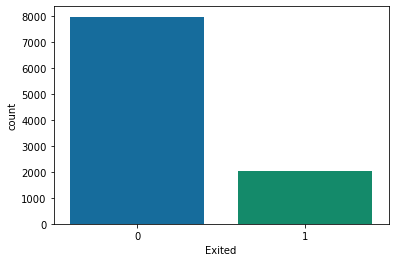

In [15]:
sns.countplot(data=df1, x='Exited',linewidth=1)

# Sampling techniques
From the above figure, it is clear that data is imbalanced. Here is a comparison of some sampling techniques to use. 

In [16]:
X = df1.drop(columns='Exited')
y = df1.Exited

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42) 

In [18]:
scaler = MinMaxScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [19]:
LR = LogisticRegression()
lr_fit = LR.fit(normalized_x_train, y_train) 

In [20]:
prediction = lr_fit.predict(normalized_x_test) #Making predictions to test the model on test data
scores = lr_fit.score(normalized_x_test, y_test)
lr_train_accuracy = LR.score(X_train, y_train)*100
lr_test_accuracy = scores*100
lr_precision = precision_score(y_test, prediction)*100
lr_recall = recall_score(y_test, prediction)*100
lr_f1 = f1_score(y_test, prediction)*100
cf = confusion_matrix(y_test, prediction)
print("train accuracy: %.2f%%" % (np.mean(lr_train_accuracy)))
print("test accuracy: %.2f%%" % (np.mean(lr_test_accuracy)))
print("precision: %.2f%%" % (np.mean(lr_precision)))
print("recall: %.2f%%" % (np.mean(lr_recall)))
print("f1 score: %.2f%%" % (np.mean(lr_f1)))
print(cf)

train accuracy: 72.34%
test accuracy: 81.80%
precision: 61.07%
recall: 20.36%
f1 score: 30.53%
[[1556   51]
 [ 313   80]]


In [21]:
ros = RandomOverSampler(random_state=777)
smote = SMOTE(random_state=777,k_neighbors=5)
smoteenn = SMOTEENN(random_state=777)
smotetomek = SMOTETomek(random_state=777)

sampling=[ros, smote, smoteenn, smotetomek]

In [22]:
train_accuracy = [lr_train_accuracy]
test_accuracy = [lr_test_accuracy]
precision = [lr_precision]
recall = [lr_recall]
f1 = [lr_f1]
cf_matrix = [cf]

for s in sampling:
    s_X, s_y = s.fit_resample(X,y)
    s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(s_X, s_y, test_size=0.3, random_state=42)
    s_X_train_scaled = pd.DataFrame(scaler.fit_transform(s_X_train),columns=s_X_train.columns)
    s_X_test_scaled = pd.DataFrame(scaler.transform(s_X_test),columns=s_X_test.columns)
    model_fit = LR.fit(s_X_train_scaled,s_y_train)
    
    prediction = model_fit.predict(s_X_test_scaled)
    scores = model_fit.score(s_X_test_scaled, s_y_test)
    train_accuracy_score = model_fit.score(s_X_train_scaled, s_y_train)
    cf = confusion_matrix(s_y_test, prediction)
    
    train_accuracy.append(train_accuracy_score*100)
    test_accuracy.append(scores * 100)
    precision.append(precision_score(s_y_test, prediction)*100)
    recall.append(recall_score(s_y_test, prediction)*100)
    f1.append(f1_score(s_y_test, prediction)*100)
    cf_matrix.append(cf)

In [23]:
sampling_list=['original','ros', 'smote', 'smoteenn', 'smotetomek']

sampling_metrics = pd.DataFrame(
    {'train_acc': train_accuracy,
     'test_acc': test_accuracy,
     'precision': precision,
     'recall': recall,
     'f1': f1
    },index=sampling_list).transpose()

sampling_metrics

,original,ros,smote,smoteenn,smotetomek
train_acc,72.337500,70.658414,73.232867,80.214849,73.157508
test_acc,81.800000,70.217664,72.101298,80.145893,72.855918
precision,61.068702,69.590890,71.309076,82.239186,72.533106
recall,20.356234,70.153061,72.491497,85.367142,73.158121
f1,30.534351,69.870845,71.895425,83.773976,72.844273


From the above table, sampling using smote ENN had superior results in all metrics compared to other sampling techniques

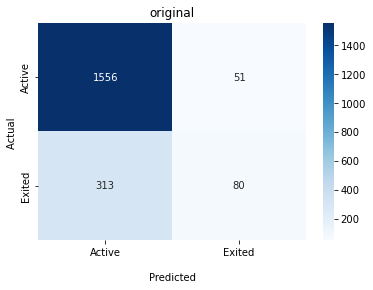

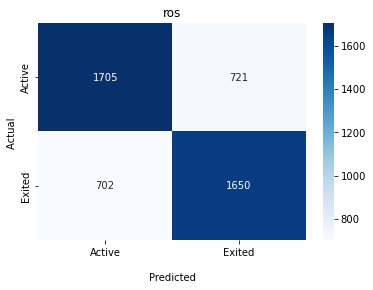

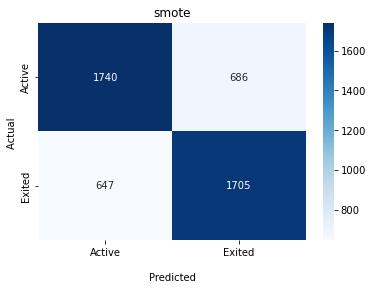

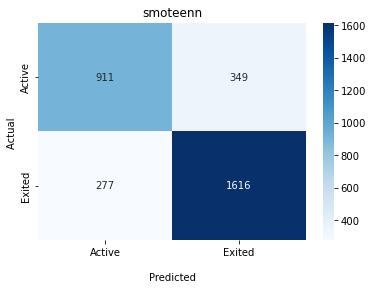

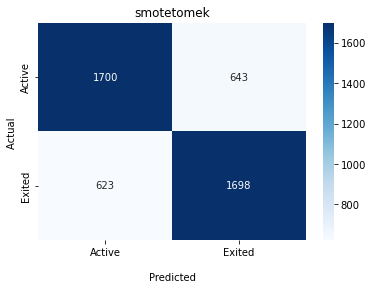

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

for c,s in zip(cf_matrix,sampling_list):
    ax = sns.heatmap(c,fmt="d", annot=True, cmap='Blues')
    ax.set_title(s);
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual ')
    ax.xaxis.set_ticklabels(['Active', 'Exited'])
    ax.yaxis.set_ticklabels(['Active', 'Exited'])
    plt.show()

# Comparison of classifiers
Using the data generated from smote enn, we try to compare the performance of the 7 classifiers below

In [25]:
s_X, s_y = smoteenn.fit_resample(X,y)
s_X_scaled = pd.DataFrame(scaler.fit_transform(s_X),columns=s_X.columns)

In [27]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(alpha=0.0001, max_iter=200),
    GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=0),
    XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, nthread=4, seed=0, verbosity = 0,use_label_encoder=False)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, s_X_scaled, s_y, scoring='accuracy', cv=CV)
    precisions = cross_val_score(model, s_X_scaled, s_y, scoring='precision', cv=CV)  
    recalls = cross_val_score(model, s_X_scaled, s_y, scoring='recall', cv=CV)  
    f1s = cross_val_score(model, s_X_scaled, s_y, scoring='f1', cv=CV)  

    for fold_idx, (accuracy, precision, recall, f1) in enumerate(zip(accuracies, precisions, recalls, f1s)):
        entries.append((model_name, fold_idx, accuracy, precision, recall, f1))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy','precision', 'recall', 'f1'])

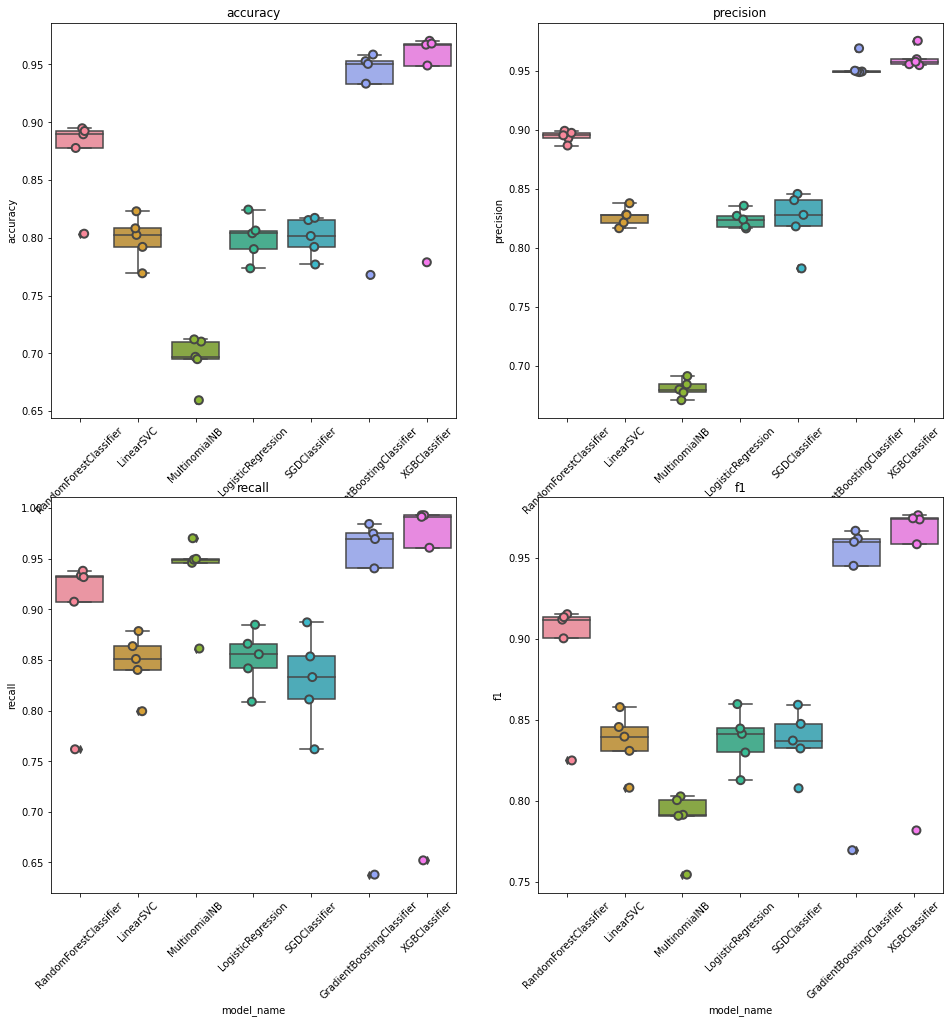

In [28]:
cols = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16,16))

for i, col in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=cv_df, x='model_name', y=col)
    sns.stripplot(data=cv_df, x='model_name', y=col, size=8, jitter=True, edgecolor='gray', linewidth=2)
    plt.xticks(rotation=45)
    plt.title(col)

In [29]:
metric_summary = pd.pivot_table(cv_df, index=['model_name'],
                    aggfunc={'accuracy': np.mean,
                             'precision': np.mean,
                             'recall': np.mean,
                             'f1': np.mean}).transpose()
metric_summary

model_name,GradientBoostingClassifier,LinearSVC,LogisticRegression,MultinomialNB,RandomForestClassifier,SGDClassifier,XGBClassifier
accuracy,0.912641,0.798995,0.799661,0.694683,0.871615,0.800612,0.926727
f1,0.920429,0.836234,0.837490,0.787791,0.892958,0.836652,0.932713
precision,0.953341,0.826424,0.824252,0.680835,0.894286,0.822966,0.960633
recall,0.901407,0.846528,0.851388,0.935258,0.894504,0.829281,0.918024


From the above table, XGB and GB performed better in all 4 metrics compared to other classifiers.

Results can be improved by hypertuning parameters. Also, depending on the nature of the problem, one can either prioritize precision over recall and vice versa. For this problem, since we want to be able to predict customers who are likely to close their account, we want recall to be high (low false negatives, not predicting 'active' when customer has actually exited)